In [2]:
#Coefficient of multiple correlation
# The phenotypic characteristics of each stomata complex is extracted by the Mask RCNN and CellProifler pipeline
# !pip install pycytominer
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
morph = pd.read_csv("./Oscar_scaled_avgSCO.csv")
morph.head()

,Unnamed: 0,Metadata_week.x,Metadata_genotype.x,Group,Subgroup,GCO_stomata_desity,GCO_AreaShape_Area,GCO_AreaShape_BoundingBoxArea,GCO_AreaShape_Compactness,GCO_AreaShape_ConvexArea,...,avg_sco_Perimeter,avg_sco_BoundingBoxArea,avg_sco_ConvexArea,avg_sco_Eccentricity,avg_sco_FormFactor,avg_sco_MeanRadius,avg_sco_MaximumRadius,avg_sco_Area,avg_sco_MinorAxisLength,Ratio_G_S_area
0,0,Week1,B73,SS,SS-B73,10,405,576,2.308191,458,...,97.012193,780,478,0.860685,0.558128,3.030867,7.810250,418,18.190126,0.484450
1,1,Week1,B73,SS,SS-B73,10,381,495,2.239848,432,...,86.597980,648,420,0.824073,0.660223,3.238071,8.544004,394,18.064705,0.483503
2,2,Week1,B73,SS,SS-B73,10,490,954,2.565985,605,...,101.254834,840,483,0.912109,0.507433,2.895797,7.280110,414,16.092025,0.591787
3,3,Week1,B73,SS,SS-B73,10,416,750,2.586656,512,...,86.870058,494,363,0.944008,0.559511,2.731353,6.324555,336,12.390288,0.619048
4,4,Week1,B73,SS,SS-B73,10,410,624,2.315030,475,...,85.597980,612,383,0.875284,0.595131,2.913475,7.211103,347,15.644407,0.590778


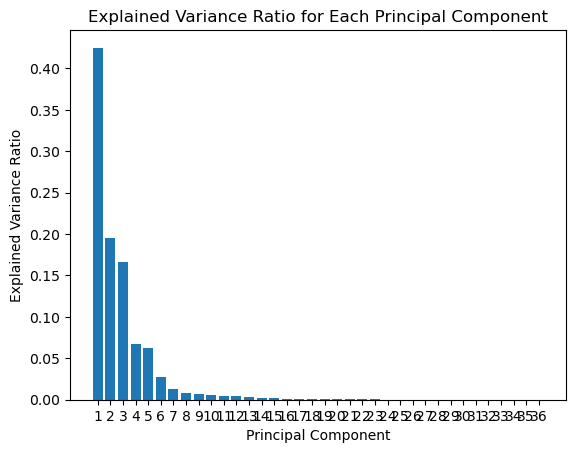

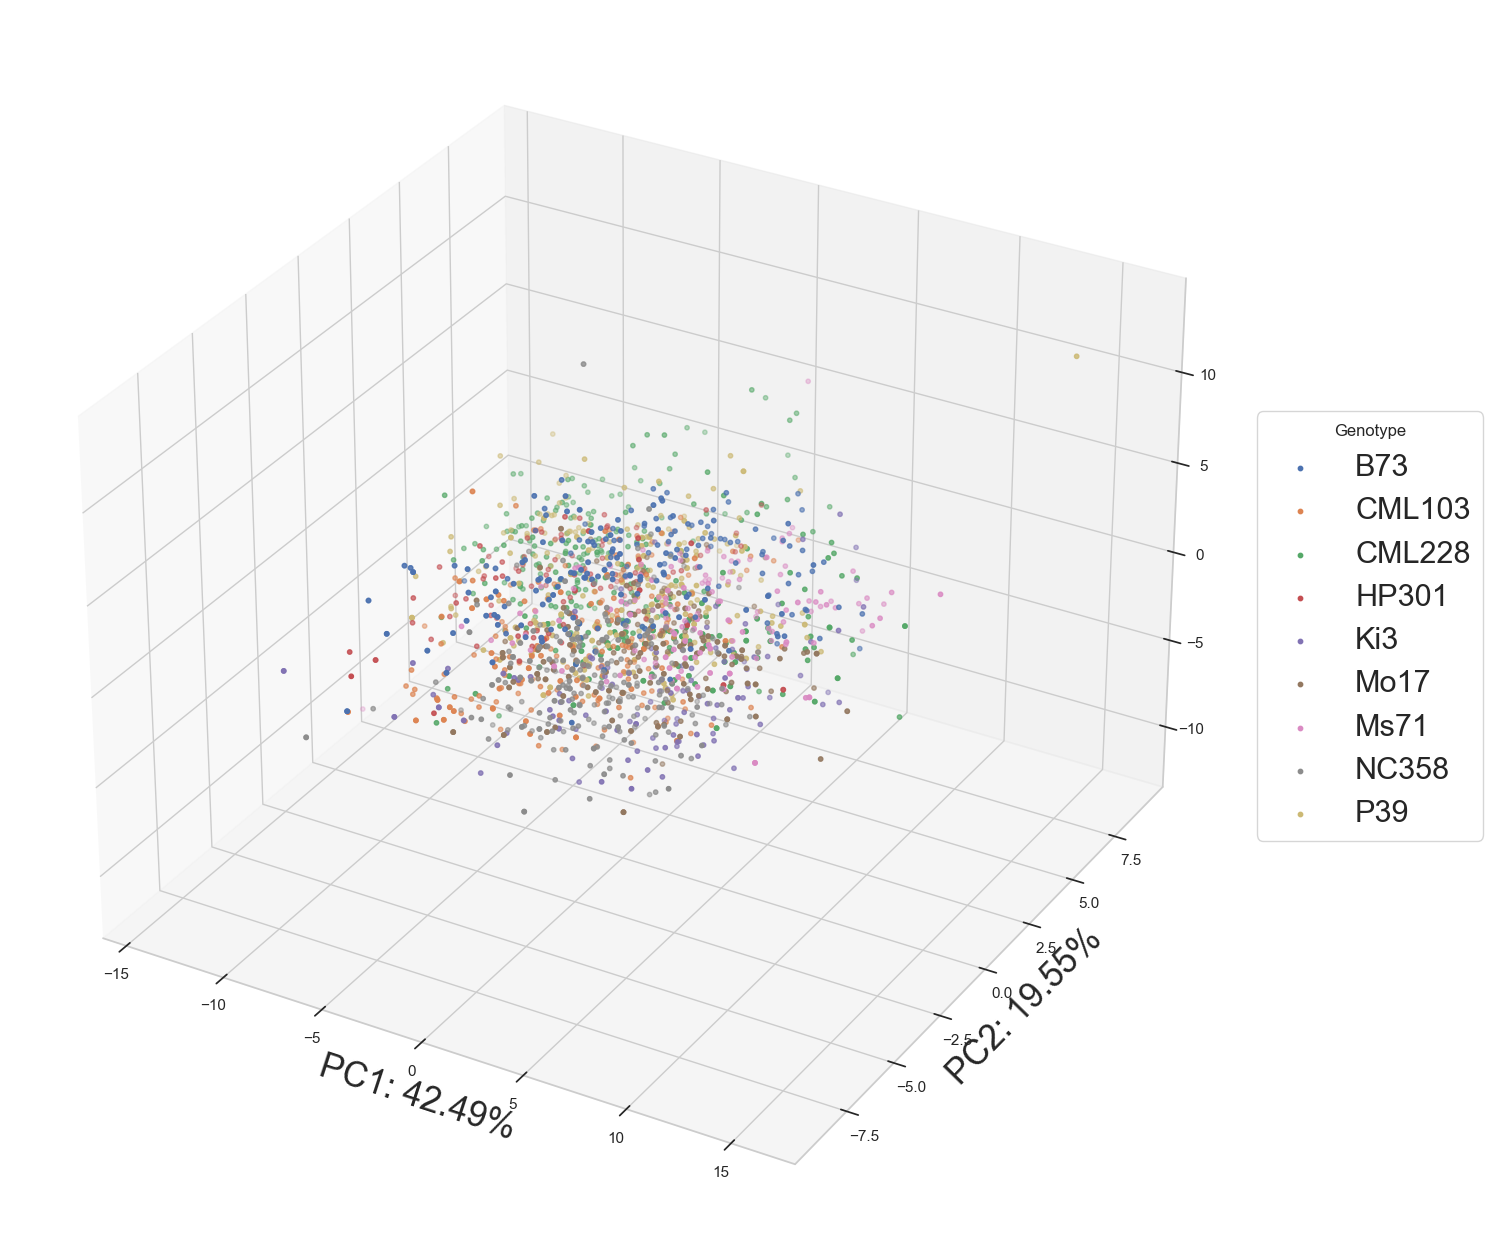

In [3]:
df = morph.copy()
df = df.drop(columns = ['Unnamed: 0', "GCO_stomata_desity"])


%load_ext autoreload
%autoreload 2

from PCA_analysis import PCA_analysis
pca, final_df= PCA_analysis(df, True)

explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.grid(False)
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
# Plotting PCA results in 3D with color labels based on 'Metadata_genotype.x'
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')



# Scatter plot for PC1, PC2, and PC3
for Genotype in final_df['Metadata_genotype.x'].unique():
   data = final_df[final_df['Metadata_genotype.x'] == Genotype]
   ax.scatter(data['PC1'], data['PC2'], data['PC3'], label=Genotype, s=10)

ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=25)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=25)
# ax.set_zlabel(f'PC3: {pca.explained_variance_ratio_[2]*100:.2f}%', fontsize=25)
ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
plt.show()


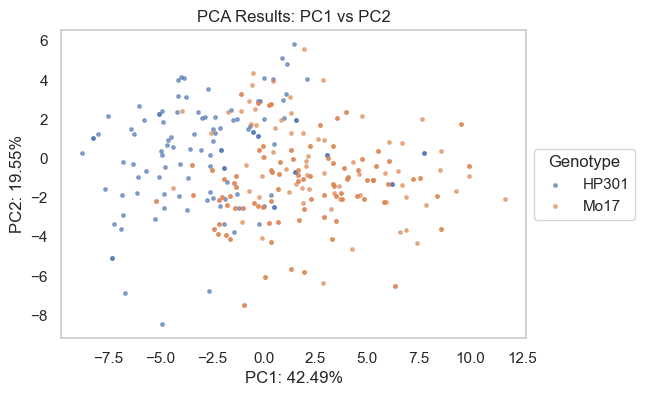

In [12]:
# Set the style for the plot

Genotype = ['HP301', 'Mo17']
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in Genotype:
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], label=Genotype, s=6, alpha=0.6)

ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=12)

ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC2')
plt.grid(False)
plt.show()

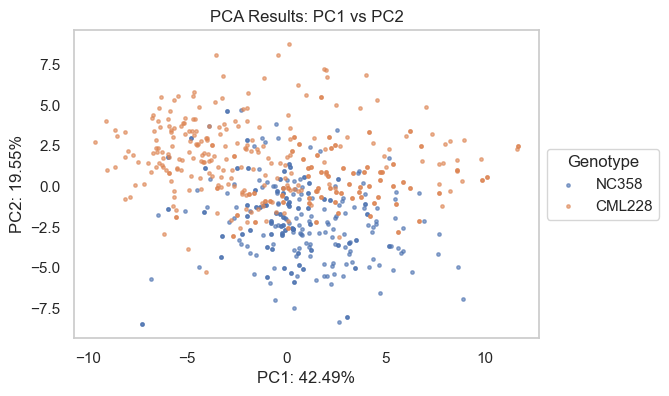

In [8]:
# Set the style for the plot

Genotype = ['NC358', 'CML228']
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in Genotype:
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], label=Genotype, s=6, alpha=0.6)

ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=12)

ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC2')
plt.grid(False)
plt.show()

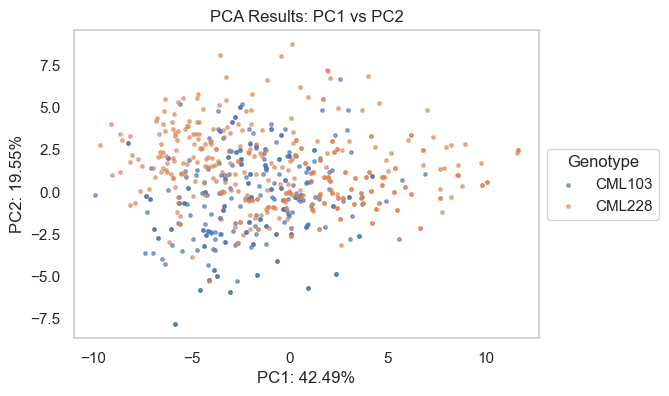

In [7]:
# Set the style for the plot

Genotype = ['CML103', 'CML228']
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in Genotype:
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], label=Genotype, s=6, alpha=0.6)

ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=12)

ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC2')
plt.grid(False)
plt.show()

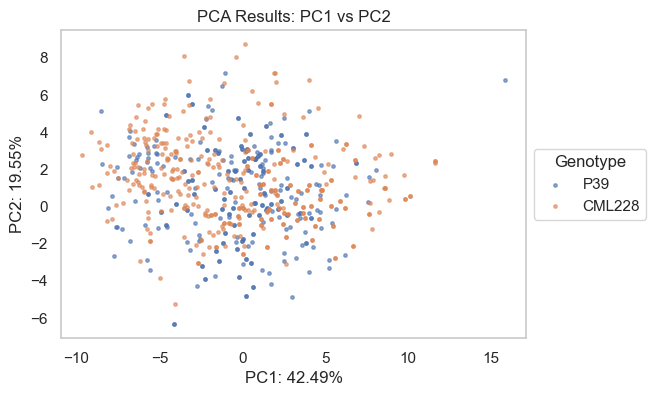

In [9]:

Genotype = ['P39', 'CML228']
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in Genotype:
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], label=Genotype, s=6, alpha=0.6)
ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=12)

ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC2')
plt.grid(False)
plt.show()

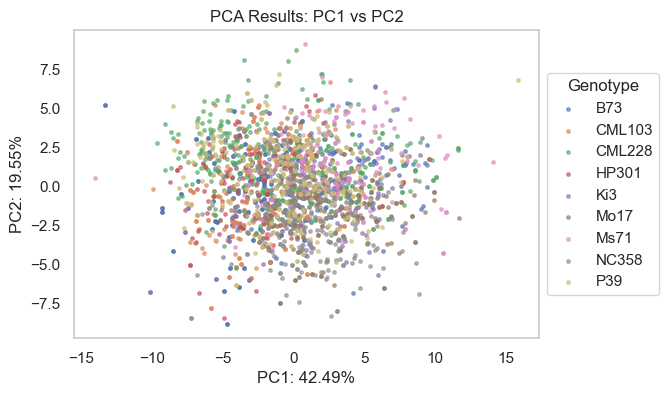

In [10]:
# Set the style for the plot
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in final_df['Metadata_genotype.x'].unique():
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], label=Genotype, s=6, alpha=0.6)
ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=12)
ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC2')
plt.grid(False)
plt.show()

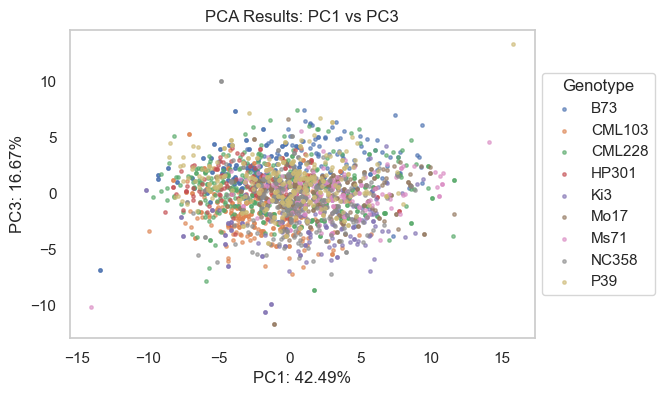

In [11]:
# Set the style for the plot
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(6, 4))
for Genotype in final_df['Metadata_genotype.x'].unique():
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC3'], label=Genotype, s=6, alpha=0.6)
ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=12)
ax.set_ylabel(f'PC3: {pca.explained_variance_ratio_[2]*100:.2f}%', fontsize=12)
ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('PCA Results: PC1 vs PC3')
plt.grid(False)
plt.show()

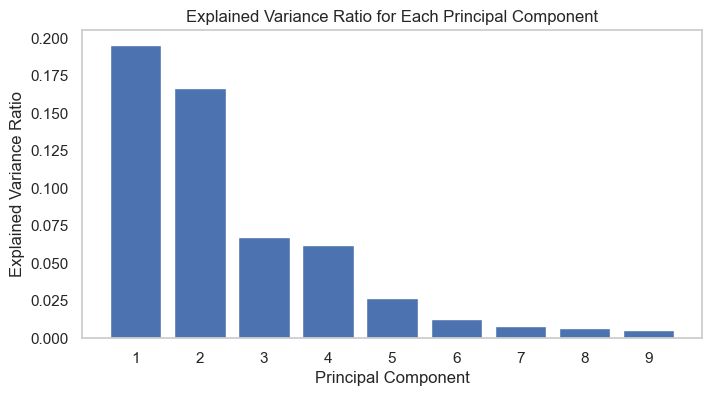

In [53]:
# Create a bar plot
explained_variance_ratio = pca.explained_variance_ratio_[1:10]
fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.grid(False)
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, 10))
plt.show()

In [55]:
genotype = df["Metadata_genotype.x"].unique()
print(genotype)

['B73' 'CML103' 'CML228' 'HP301' 'Ki3' 'Mo17' 'Ms71' 'NC358' 'P39']


In [56]:
df = morph.copy()
df = df.drop(columns = ['Unnamed: 0', "GCO_stomata_desity"])

# genotypes = ['Ms71', 'Mo17', 'HP301', 'B73','NC358']
# df['single_genotype'] = df['Metadata_genotype.x'].apply(lambda x: "slow" if x in genotypes else "fast")

X = df.filter(regex='^(GCO|avg_)')
y = df.filter(['Metadata_genotype.x'])
from Random_forest_classifier import run_random_forest_classifier
feature_names, sorted_importances = run_random_forest_classifier(X, y, 1000, n = 42)

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


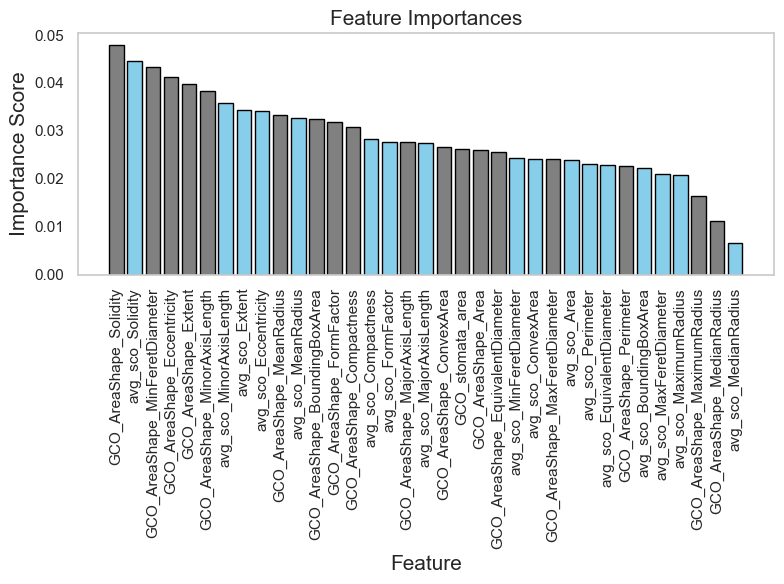

In [57]:
from Random_forest_classifier import visulize_feature_importance
visulize_feature_importance(8, 6, feature_names, sorted_importances)


/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.6973770628850912
Recall: 0.6883408071748879
F1 Score: 0.685684335463663
Accuracy: 0.6883408071748879
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]


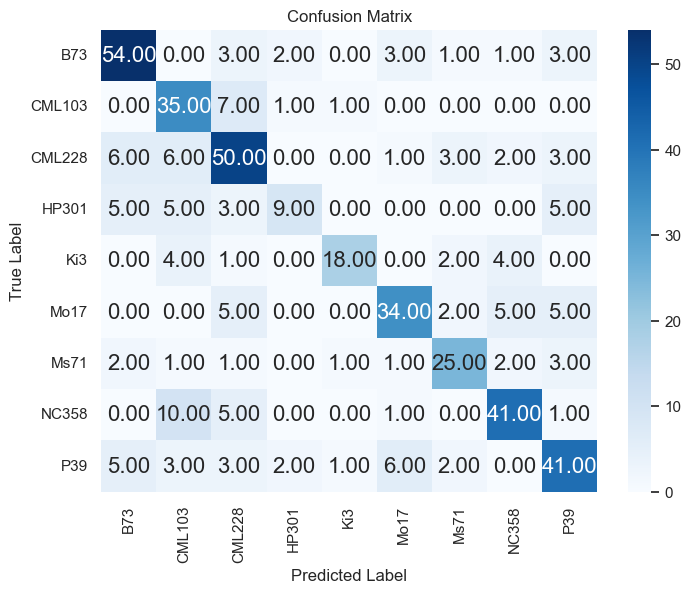

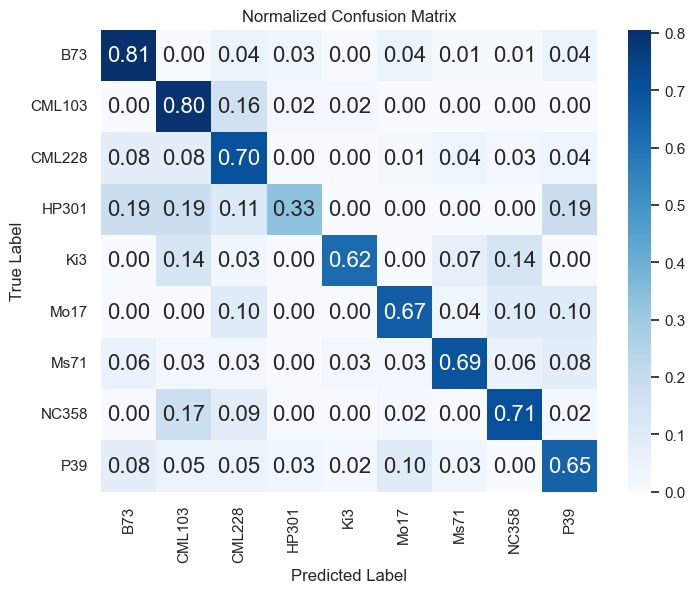

(     Metadata_genotype.x
 56                   B73
 494                  Ki3
 1676              CML228
 218                HP301
 744               CML228
 ...                  ...
 1911               NC358
 2033                 P39
 1132              CML103
 700               CML103
 1228              CML228
 
 [446 rows x 1 columns],
 array(['B73', 'Ki3', 'CML228', 'P39', 'CML228', 'Mo17', 'CML228', 'NC358',
        'HP301', 'Ms71', 'CML228', 'Ms71', 'CML103', 'CML103', 'CML228',
        'CML103', 'B73', 'P39', 'CML103', 'Mo17', 'B73', 'P39', 'P39',
        'Ms71', 'B73', 'Mo17', 'Mo17', 'CML228', 'B73', 'Mo17', 'P39',
        'P39', 'CML103', 'B73', 'CML103', 'Ms71', 'CML228', 'NC358',
        'CML228', 'NC358', 'P39', 'P39', 'CML228', 'CML228', 'CML103',
        'NC358', 'NC358', 'P39', 'Mo17', 'CML103', 'P39', 'B73', 'CML228',
        'CML228', 'CML228', 'B73', 'HP301', 'B73', 'Mo17', 'HP301', 'Mo17',
        'Ki3', 'NC358', 'B73', 'Ms71', 'NC358', 'NC358', 'CML103', 'Ms71',
    

In [59]:
from Random_forest_classifier import evaluation_classifier
from Random_forest_classifier import visulize_confusion_matrix

y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)

columns = y["Metadata_genotype.x"].unique()
visulize_confusion_matrix(y_ture=y_test, columns = columns,  y_pred = y_pred, a=8, b=6)


/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.6973770628850912
Recall: 0.6883408071748879
F1 Score: 0.685684335463663
Accuracy: 0.6883408071748879
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]
['B73' 'Ki3' 'CML228' 'P39' 'CML228' 'Mo17' 'CML228' 'NC358' 'HP301'
 'Ms71' 'CML228' 'Ms71' 'CML103' 'CML103' 'CML228' 'CML103' 'B73' 'P39'
 'CML103' 'Mo17' 'B73' 'P39' 'P39' 'Ms71' 'B73' 'Mo17' 'Mo17' 'CML228'
 'B73' 'Mo17' 'P39' 'P39' 'CML103' 'B73' 'CML103' 'Ms71' 'CML228' 'NC358'
 'CML228' 'NC358' 'P39' 'P39' 'CML228' 'CML228' 'CML103' 'NC358' 'NC358'
 'P39' 'Mo17' 'CML103' 'P39' 'B73' 'CML228' 'CML228' 'CML228' 'B73'
 'HP301' 'B73' 'Mo17' 'HP301' 'Mo17' 'Ki3' 'NC358' 'B73' 'Ms71' 'NC358'
 'NC358' 'CML103' 'Ms71' 'Mo17' 'CML103' 'B73' 'B73' 'B73' 'HP3

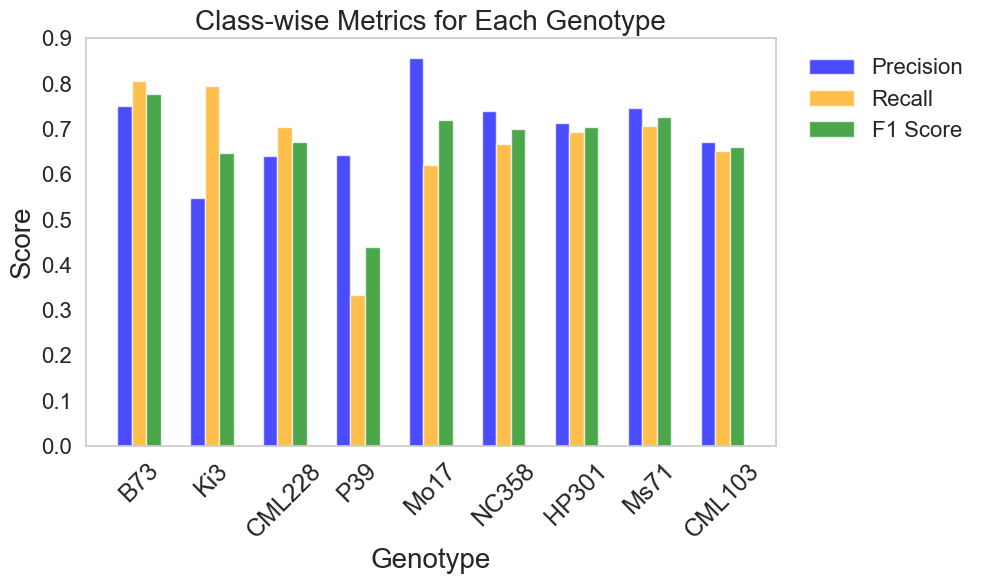

In [72]:
# Evaluate the classifier
y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)

# Print predictions
print(y_pred)

# Compute class-wise precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Define the genotypes
genotypes = df['pred_genotype.x'].unique()
num_genotypes = len(genotypes)
bar_width = 0.2
index = np.arange(num_genotypes)

# Plotting
plt.figure(figsize=(10, 6), facecolor='none')
plt.grid(False)

plt.bar(index - bar_width, precision, label='Precision', color='blue', width=bar_width, alpha=0.7)
plt.bar(index, recall, label='Recall', color='orange', width=bar_width, alpha=0.7)
plt.bar(index + bar_width, f1_score, label='F1 Score', color='green', width=bar_width, alpha=0.7)

plt.title('Class-wise Metrics for Each Genotype', fontsize=20)
plt.xlabel('Genotype', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.xticks(index, genotypes, rotation=45, fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)

plt.tight_layout()
plt.show()

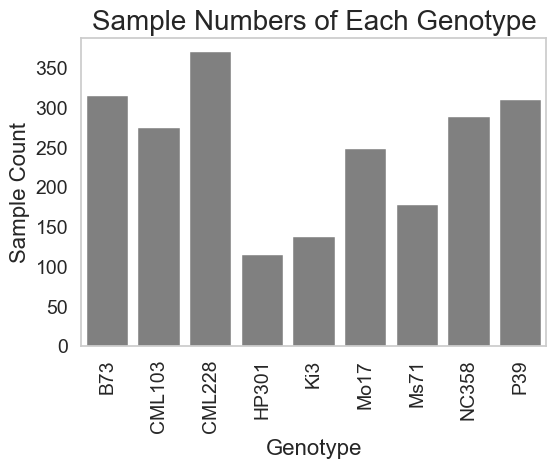

<Figure size 1000x800 with 0 Axes>

In [73]:
# Create a countplot with gray color for all genotypes
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Metadata_genotype.x', data=morph, color='gray', linewidth=0.3)

# Set the title and labels
plt.title('Sample Numbers of Each Genotype', fontsize=20)
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Genotype', fontsize=16)
plt.ylabel('Sample Count', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.figure(figsize=(10, 8))
plt.tight_layout()
plt.show()

    Metadata_genotype.x  index2
0                   B73      56
1                   Ki3     494
2                CML228    1676
3                 HP301     218
4                CML228     744
..                  ...     ...
441               NC358    1911
442                 P39    2033
443              CML103    1132
444              CML103     700
445              CML228    1228

[446 rows x 2 columns]
    Metadata_genotype.x_x  index2  index pred_genotype.x  Unnamed: 0  \
0                   HP301     218      3             P39         218   
1                     P39     543      8           HP301         543   
2                    Mo17    1284      9            Ms71        1284   
3                     Ki3    2178     15          CML103        2178   
4                     P39     423     18          CML103         423   
..                    ...     ...    ...             ...         ...   
134                  Mo17    1304    433             P39        1304   
135             

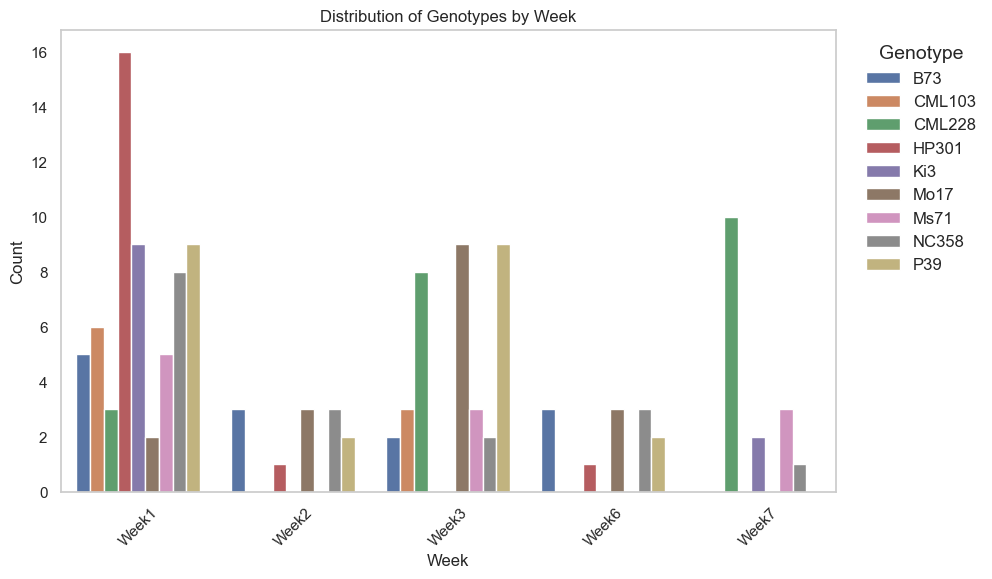

In [63]:
### Detect if the wrong lable for certain genotype is from the same image or not

df = pd.DataFrame(y_pred, columns=['pred_genotype.x'])
df['index'] = df.index

y_true['index2'] = y_true.index
y_true.reset_index(drop=True, inplace=True)

print(y_true)

y_true['index'] = y_true.index
merged_df = pd.merge(y_true, df, on='index')

# Filter rows where 'Metadata_genotype.x' is not equal to 'pred_genotype.x'
filtered_df = merged_df[merged_df['Metadata_genotype.x'] != merged_df['pred_genotype.x']]

# Merge the base DataFrame with the week DataFrame based on the index
merged_df2 = pd.merge(filtered_df, morph, left_on = 'index2', right_on='Unnamed: 0')

merged_df2 = merged_df2.iloc[:, :7]


print(merged_df2)
# Count occurrences of each genotype by week
genotype_counts = merged_df2.groupby(['Metadata_week.x', 'Metadata_genotype.x_x']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genotype_counts, x='Metadata_week.x', y='Count', hue='Metadata_genotype.x_x')
plt.grid(False)
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Distribution of Genotypes by Week')
plt.legend(title='Genotype', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
plt.xticks(rotation=45)
plt.show()

      Metric  All_feature       SCO       GCO
0  Precision     0.697872  0.575083  0.663166
1     Recall     0.688341  0.567265  0.647982
2   F1 Score     0.685820  0.564795  0.641036
3   Accuracy     0.688341  0.567265  0.647982


<Figure size 1000x800 with 0 Axes>

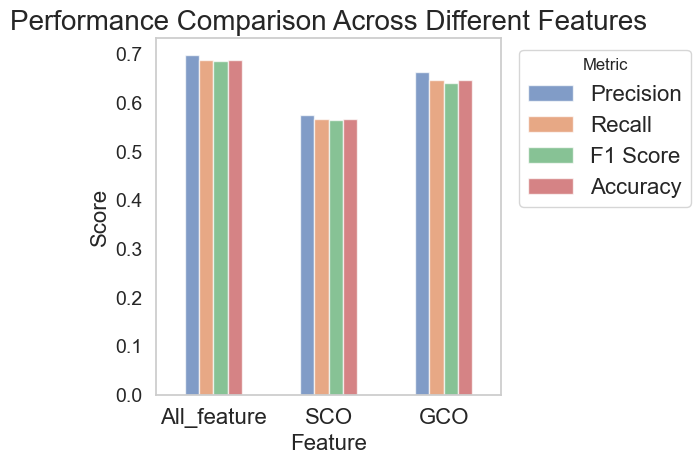

In [75]:
### use the same pipeline, but use individual GCO and SCO features and comparing the performance

# Define the data
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'All_feature': [0.6978723168837083, 0.6883408071748879, 0.6858196011071382, 0.6883408071748879],
    'SCO': [0.5750834622950078, 0.5672645739910314, 0.5647948042819123, 0.5672645739910314],
    'GCO': [0.6631655033594059, 0.647982062780269, 0.6410359584266648, 0.647982062780269]
}

# Create DataFrame
plt.rcParams['font.family'] = 'Arial'
df = pd.DataFrame(data)
print(df)

# Plotting
plt.figure(figsize=(10, 8))

df_transposed = df.set_index('Metric').transpose()
df_transposed.plot(kind='bar', alpha=0.7)
plt.title('Performance Comparison Across Different Features', fontsize=20)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title='Metric', fontsize=16, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(False)

plt.tight_layout()
plt.show()

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


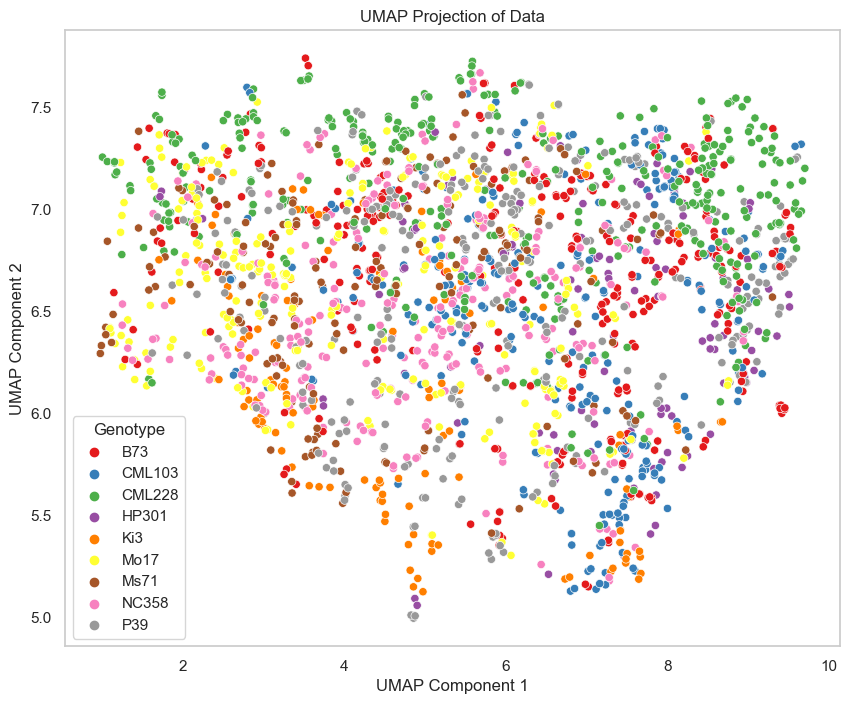

In [76]:
## !pip install umap-learn
import umap
df = pd.read_csv("Oscar_scaled_morph2.csv")
features = df.filter(regex='^(GCO|avg_)')
genotype = df['Metadata_genotype.x']

# Initialize UMAP with desired parameters
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.4, n_components=50, random_state=42)

# Fit UMAP to your data and transform it to the lower-dimensional space
umap_result = umap_model.fit_transform(features)

# Plot the UMAP projection, color-coded by genotype
plt.figure(figsize=(10, 8))
plt.grid(False)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=genotype, palette='Set1', legend='full')
plt.title('UMAP Projection of Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Genotype')
plt.show()


/var/folders/gt/w451x6dd2xs29hm6r8jx9bph0000gn/T/ipykernel_87582/1193287815.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(genotypes).mean()
/var/folders/gt/w451x6dd2xs29hm6r8jx9bph0000gn/T/ipykernel_87582/1193287815.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = hierarchy.linkage(distance_matrix, method='complete')


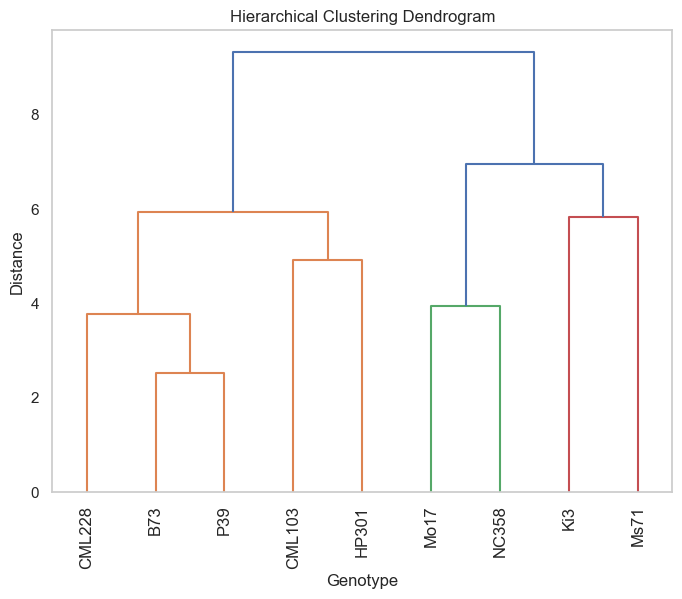

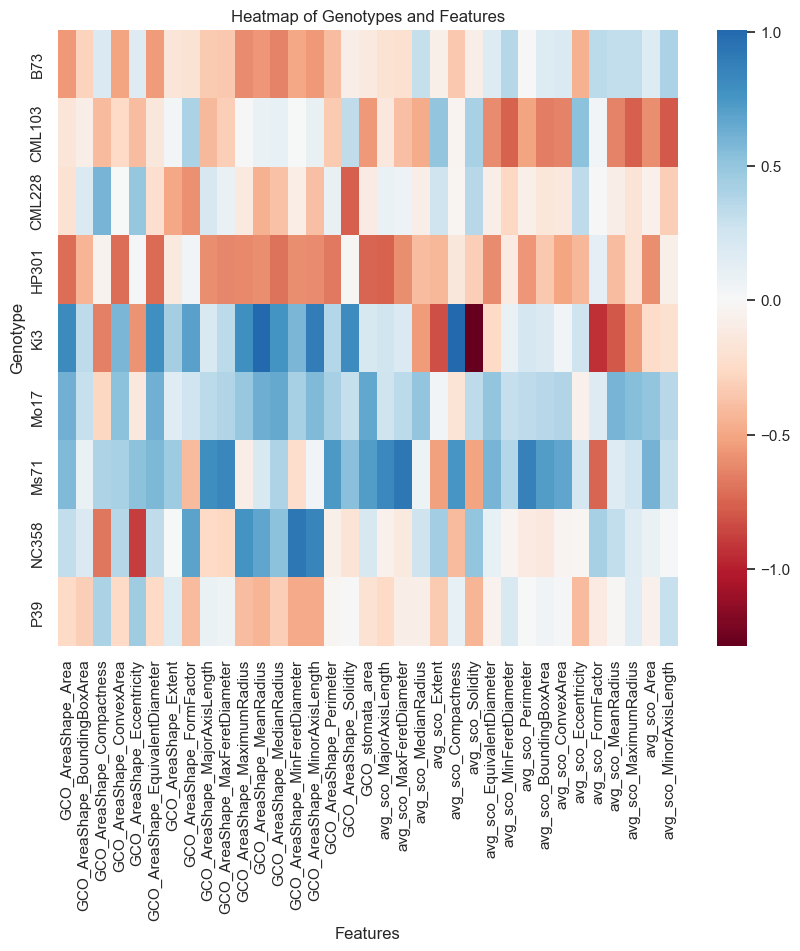

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster import hierarchy
# Load the data
data = pd.read_csv("Oscar_scaled_morph2.csv")

genotypes = df['Metadata_genotype.x']

# Aggregate data for each genotype by calculating the mean
aggregated_data = data.groupby(genotypes).mean()

# Select relevant features for building the phylogenetic tree
selected_features = aggregated_data.filter(regex='^(GCO|avg_)')
# bset the data frame to include only the selected features
data = selected_features

# Calculate the distance matrix using Euclidean distance
distance_matrix = distance.squareform(distance.pdist(data, metric='euclidean'))

# Perform hierarchical clustering using complete linkage
clustering = hierarchy.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
plt.grid(False)
dendrogram = hierarchy.dendrogram(clustering, labels=aggregated_data.index, orientation='top')

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Genotype')
plt.ylabel('Distance')

plt.xticks(rotation=90)
plt.show()

# Create a heatmap with a diverging colormap
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap='RdBu', center=0, cbar=True)  # Use 'RdBu' colormap for red to blue transition
plt.title('Heatmap of Genotypes and Features')
plt.xlabel('Features')
plt.ylabel('Genotype')
plt.show()